[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/biodatlab/deep-learning-skooldio/blob/master/01_pytorch_functional.ipynb)

## Using torch Functional

documentation: https://pytorch.org/docs/stable/nn.functional.html

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Non-linear activation functions

There are two main ways to create a non-linear activation function in PyTorch. The first is to use the `torch.nn` module, which contain a pre-defined activation functions. The second is to use the `torch.nn.functional` module, which contains a large number of functions that can be used as an activation functions.

In [2]:
x = torch.tensor([10.])

# Use functional to apply ReLU
print(F.relu(x))

# Use nn.ReLU to apply ReLU
relu = nn.ReLU()
print(relu(x))

tensor([10.])
tensor([10.])


In [3]:
x = torch.arange(-10, 10, 0.01)

# TODO: Apply sigmoid, relu, and tanh to a range of x
x_sigmoid = F.sigmoid(x)
x_relu = F.relu(x)
x_tanh = F.tanh(x)

/Users/titipata/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/titipata/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


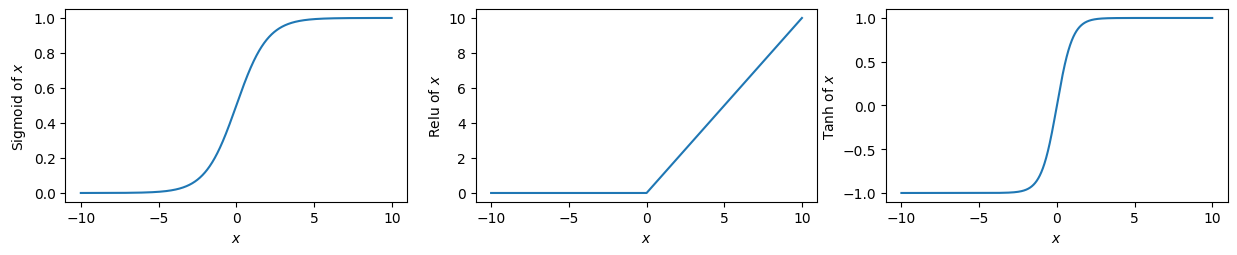

In [5]:
fig = plt.figure(figsize=(15, 2.5))

plt.subplot(1, 3, 1)
plt.plot(x, x_sigmoid)
plt.xlabel("$x$")
plt.ylabel("Sigmoid of $x$")

plt.subplot(1, 3, 2)
plt.plot(x, x_relu)
plt.xlabel("$x$")
plt.ylabel("Relu of $x$")

plt.subplot(1, 3, 3)
plt.plot(x, x_tanh)
plt.xlabel("$x$")
plt.ylabel("Tanh of $x$")

plt.show()

## Using softmax

In [6]:
# Example of softmax function to operate on output of a neural network
P = torch.tensor([
    [15., 10., 20.],
    [5., 20., 10.]
])
# TODO: Apply softmax along the row
prob = F.softmax(P, dim=1)
print(prob)

tensor([[6.6925e-03, 4.5094e-05, 9.9326e-01],
        [3.0589e-07, 9.9995e-01, 4.5398e-05]])


In [7]:
prob[1, :].sum() # after softmax, sum along each row should equal to 1

tensor(1.0000)

In [8]:
prob.sum(dim=1)

tensor([1.0000, 1.0000])

In [9]:
prob.argmax(dim=1) # finding 

tensor([2, 1])

## Loss function

In [10]:
y_true = torch.tensor([[1., 2., 3.]])
y_pred = torch.tensor([[1.1, 2.1, 2.9]])

# TODO: Calculate MSE Loss between prediction and true label
F.mse_loss(y_pred, y_true) # 1/3 * ((1 - 1.1)^2 + (2 - 2.1)^2 + (3 - 2.9)^2)

tensor(0.0100)

In [11]:
# TODO: Calculate Cross entropy loss between prediction (y_pred_1, y_pred_2) and true label
# See which one is higher or lower
y_true = torch.tensor([[1., 0., 0.]])
y_pred_1 = torch.tensor([[20., 20., 30.]]).softmax(dim=1)
y_pred_2 = torch.tensor([[12., 0., 0.]]).softmax(dim=1)
F.cross_entropy(y_pred_1, y_true), F.cross_entropy(y_pred_2, y_true)

(tensor(1.5514), tensor(0.5515))